# 1. Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import mysql.connector as ms

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Data

In [38]:
df_info_clients = pd.read_csv('data/clients_informations.csv')

### 2.1 Data Summary: 
- **Amostra:** id

- **id_cliente:** client id

- **id_unico_cliente:**: client specific id

- **item-id:** product id

- **cep_cliente:** client's postal code

- **cidade cliente:** client's city

- **estado_cliente:** client's state

- **id_pedido:** order id

- **status_pedido:** order's status

- **horario pedido:** date and time that order was made by the client

- **pedido_aprovado:** date and time that the order was approved in the website

- **pedido_entregador:** date and time that the order was leaving for delivery

- **pedido_entregue:** date and time that the order was delivery to the client

- **data_estimada:** estimate date that the order will arrive to the client

- **id_vendedor:** salesman's id

- **preco:** price of the order in reais (R$)

- **frete:** delivery's price

- **pagamento_sequencial:**

- **pagamento_tipo:** which method the client chose to pay

- **pagamento_prestacoes:** number of parcels that the client will pay the order's value

- **pagamento_valor:** order's price + dlivery's price

- **review:** stars rating of the client

- **categoria:** product's category

- **categoria_ingles:** product's category in english

- **cep_vendedor:** salesman postal code

- **cidade_vendedor:** salesman city

- **estado_vendedor:** sales person state


In [39]:
df_info_clients.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


### 2.2 Rename Columns

In [40]:
new_columns = [ 'id',  'client_id', 'client_specific_id', 'item_id', 'client _postal_code', 'client_city', 'client_state', 'order_id', 'order_status', 'order_date', 'order_approved', 'order_dliveryman',
               'order_delivery', 'order_estimated', 'salesman_id', 'order_price', 'delivery_price', 'sequence_pay', 'paymeny_type', 'divided_pay', 'total_price', 'review', 'category', 'category_english',
               'salesman_postal', 'salesman_city', 'salesman_state']

df_info_clients.columns = new_columns

### 2.3 Data Caracteristics

In [41]:
print('Number of Rows: {}'.format( df_info_clients.shape[0] ) )
print( 'Number of Columns: {}'.format( df_info_clients.shape[1] ) )

Number of Rows: 116581
Number of Columns: 27


In [42]:
print('Data Types')
df_info_clients.dtypes

Data Types


id                       int64
client_id               object
client_specific_id      object
item_id                  int64
client _postal_code      int64
client_city             object
client_state            object
order_id                object
order_status            object
order_date              object
order_approved          object
order_dliveryman        object
order_delivery          object
order_estimated         object
salesman_id             object
order_price            float64
delivery_price         float64
sequence_pay             int64
paymeny_type            object
divided_pay              int64
total_price            float64
review                   int64
category                object
category_english        object
salesman_postal          int64
salesman_city           object
salesman_state          object
dtype: object

In [43]:
df_info_clients[["order_date"]] = df_info_clients[["order_date"]].apply(pd.to_datetime)

In [44]:
print("Check Null Values")
df_info_clients.isna().sum()

Check Null Values


id                        0
client_id                 0
client_specific_id        0
item_id                   0
client _postal_code       0
client_city               0
client_state              0
order_id                  0
order_status              0
order_date                0
order_approved           14
order_dliveryman       1213
order_delivery         2515
order_estimated           0
salesman_id               0
order_price               0
delivery_price            0
sequence_pay              0
paymeny_type              0
divided_pay               0
total_price               0
review                    0
category                  0
category_english          0
salesman_postal           0
salesman_city             0
salesman_state            0
dtype: int64

In order to analyse the null values, I will create a query to count the status of them

In [ ]:
query = """
SELECT order_status, 
COUNT(id)
FROM df_info_clients
WHERE order_approved IS NULL
OR order_dliveryman IS NULL
OR order_delivery IS NULL
GROUP BY order_status
"""
ps.sqldf(query, locals())

ObjectNotExecutableError: Not an executable object: '\nSELECT order_status, \nCOUNT(id)\nFROM df_info_clients\nWHERE order_approved IS NULL\nOR order_dliveryman IS NULL\nOR order_delivery IS NULL\nGROUP BY order_status\n'

In [ ]:
query = """select * from df_info_clients
where (order_approved is null or order_dliveryman is null or order_delivery is null) and order_status = 'delivered'  
"""
ps.sqldf(query, locals()).iloc[:, 8:14]

ObjectNotExecutableError: Not an executable object: "select * from df_info_clients\nwhere (order_approved is null or order_dliveryman is null or order_delivery is null) and order_status = 'delivered'  \n"

It is possible to see that only 23 of the null values are erros, because the status is "delivered" but they do not have: 
- the date of order approval 

or 
- the date that the order was leaving for delivery 

or 
- the date that the order was delivery to the client

For this reason, I will delete these values.

In [48]:
query = """select * from df_info_clients
where (order_approved is not null 
and order_dliveryman is not null 
and order_delivery is not null)
or order_status <> 'delivered';
"""
df_info_clients = ps.sqldf(query, globals())

ObjectNotExecutableError: Not an executable object: "select * from df_info_clients\nwhere (order_approved is not null \nand order_dliveryman is not null \nand order_delivery is not null)\nor order_status <> 'delivered';\n"

# 3 Exploratory Data Analysis
In order to understand and get more familiar with the dataset, I will perform a exploratory data analysis.

### 3.1) Categorical variables
#### 3.1.1) Item ID

1     102118
2      10169
3       2363
4        984
5        465
6        263
7         61
8         36
9         29
10        26
11        18
12        13
13         8
14         7
15         5
16         3
17         3
18         3
19         3
20         3
21         1
Name: item_id, dtype: int64


<Axes: xlabel='item_id', ylabel='count'>

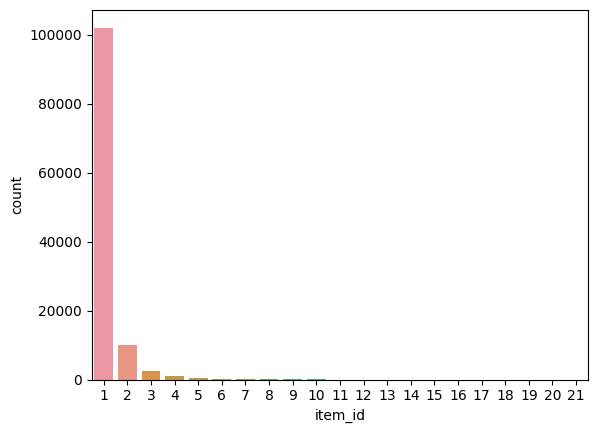

In [ ]:
print(df_info_clients['item_id'].value_counts(normalize=False))
sns.countplot(data=df_info_clients, x="item_id")

#### 3.1.2) City

sao paulo                18412
rio de janeiro            8123
belo horizonte            3218
brasilia                  2452
curitiba                  1799
campinas                  1722
porto alegre              1641
salvador                  1498
guarulhos                 1388
sao bernardo do campo     1100
niteroi                   1047
santo andre                906
osasco                     894
goiania                    852
santos                     837
Name: client_city, dtype: int64


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

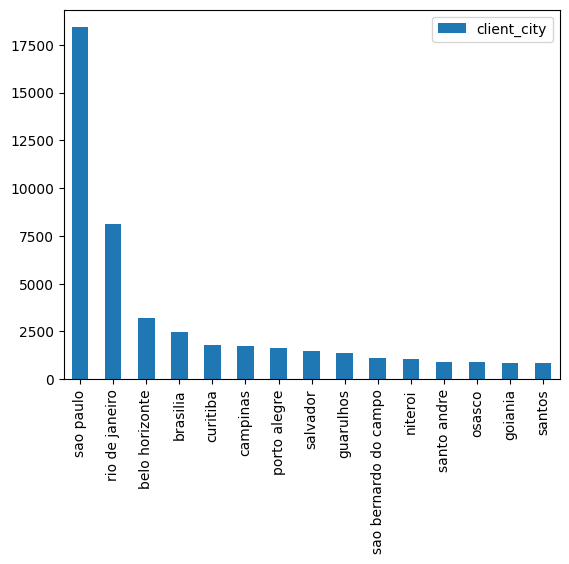

In [ ]:
print(df_info_clients['client_city'].value_counts(normalize=False).head(15))
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
pd.DataFrame(df_info_clients['client_city'].value_counts(normalize=False).head(15)).plot(kind='bar')
plt.show()

#### 3.1.3) State

SP    49133
RJ    15185
MG    13530
RS     6436
PR     5908
SC     4254
BA     3994
DF     2467
GO     2396
ES     2332
PE     1878
CE     1538
MT     1116
PA     1103
MS      847
MA      838
PB      630
PI      567
RN      565
AL      458
SE      395
TO      334
RO      280
AM      170
AC       93
AP       84
RR       50
Name: client_state, dtype: int64


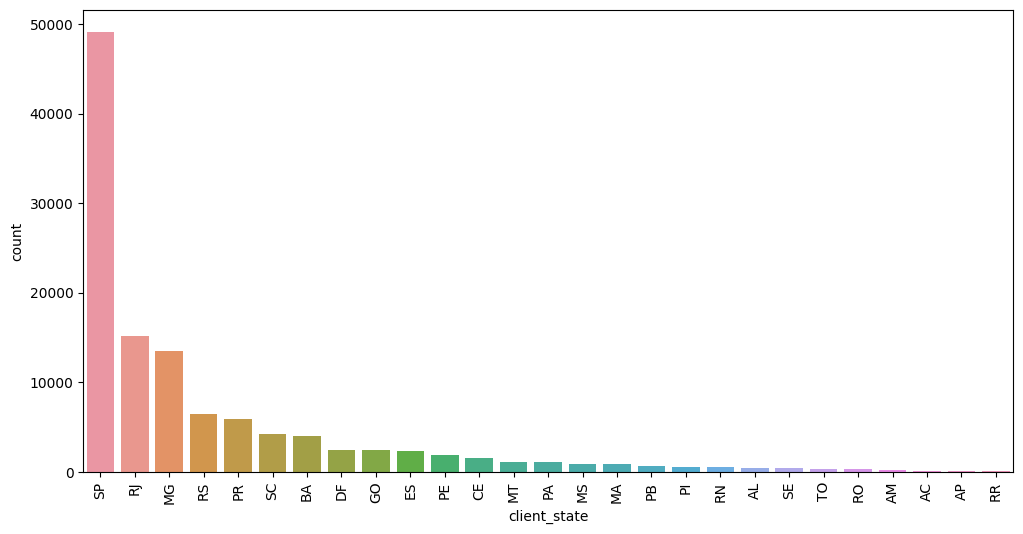

In [ ]:
print(df_info_clients['client_state'].value_counts(normalize=False))
plt.figure(figsize=(12, 6))
sns.countplot(data=df_info_clients, x="client_state", order = df_info_clients['client_state'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### 3.1.4) Months

In [ ]:
query = """
select strftime('%Y-%m',order_date) as date,
count(id) as order_per_month
from df_info_clients
group by date
"""

print(ps.sqldf(query, locals()))
plt.figure(figsize=(12, 6))
sns.barplot(data=ps.sqldf(query, locals()), x="date", y="order_per_month")
plt.xticks(rotation=90)
plt.show()

ObjectNotExecutableError: Not an executable object: "\nselect strftime('%Y-%m',order_date) as date,\ncount(id) as order_per_month\nfrom df_info_clients\ngroup by date\n"

#### 3.1.5) Years

In [ ]:
query = """
select strftime('%Y',order_date) as date,
count(id) as order_per_year
from df_info_clients
group by date
"""

print(ps.sqldf(query, locals()))
plt.figure(figsize=(12, 6))
sns.barplot(data=ps.sqldf(query, locals()), x="date", y="order_per_year")
plt.xticks(rotation=90)
plt.show()

ObjectNotExecutableError: Not an executable object: "\nselect strftime('%Y',order_date) as date,\ncount(id) as order_per_year\nfrom df_info_clients\ngroup by date\n"

#### 3.1.6) Category

In [ ]:
query = """
select category_english,
count(id) as count_category
from df_info_clients
group by category_english
order by count_category desc
limit 10
"""

print(ps.sqldf(query, locals()))
plt.figure(figsize=(20, 6))
sns.barplot(data=ps.sqldf(query, locals()), x="category_english", y="count_category")
plt.xticks(rotation=90)
plt.show()

: 

### 3.2) Numerical variables

In order to make our job easier, I am going to define some functions of statistics and graphs

In [49]:
def statistics(df_column):
    column_mean = df_column.mean()
    column_median = df_column.median()
    column_std = df_column.std()
    column_min = df_column.min()
    column_max = df_column.max()
    column_skew = df_column.skew()
    column_kutosis = df_column.kurtosis()
    
    stats = pd.DataFrame([column_mean, column_median, column_std, column_min, column_max, column_skew, column_kutosis]).T
    stats.columns = ['mean', 'median', 'std', 'min', 'max', 'skew', 'kurtosis']
    
    return stats

In [50]:
def histogram(df_column):
    plt.figure(figsize=(12, 6))
    return sns.distplot(df_column)

#### 3.1) Order's Price 

In [51]:
statistics(df_info_clients['order_price'])

,mean,median,std,min,max,skew,kurtosis
0,120.751369,74.9,183.848421,0.85,6735.0,7.860937,118.942687


<Axes: xlabel='order_price', ylabel='Density'>

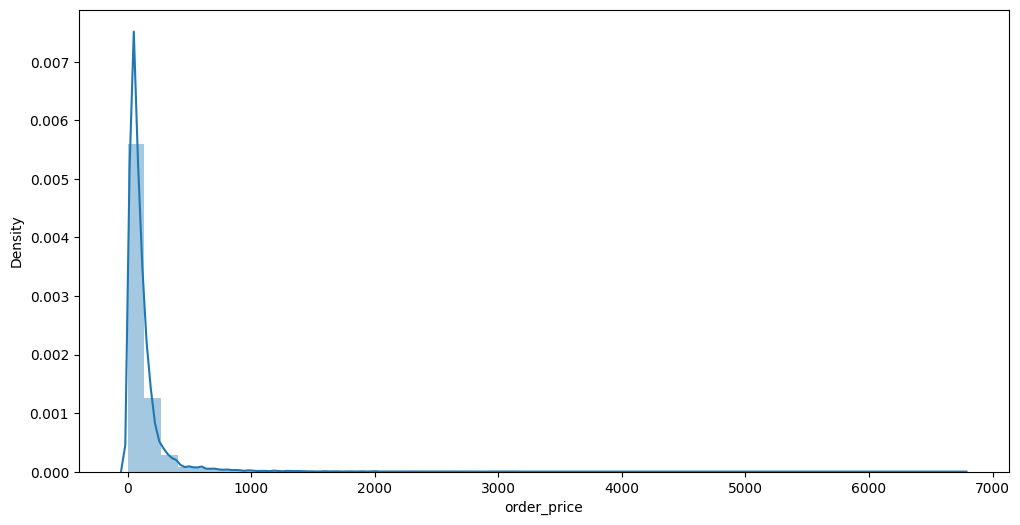

In [52]:
histogram(df_info_clients['order_price'])

<Axes: ylabel='Density'>

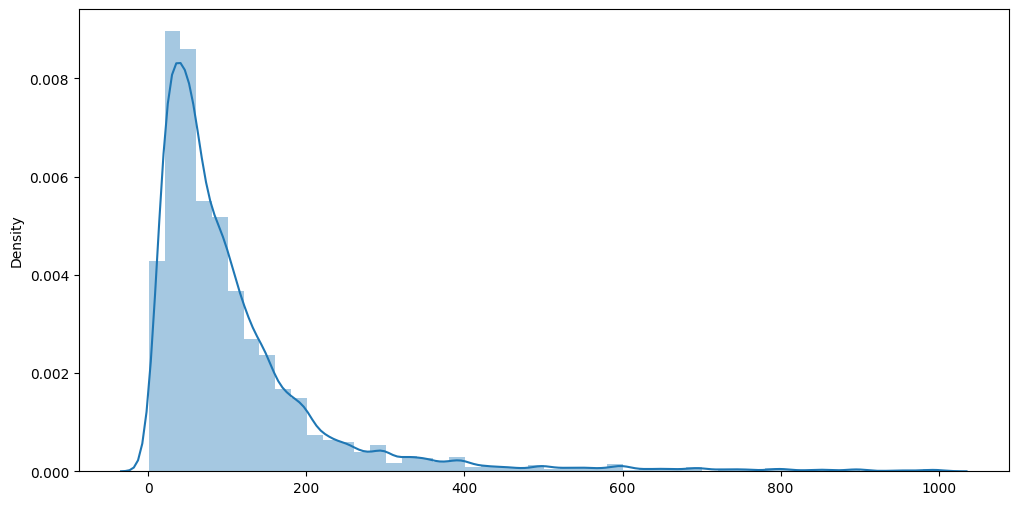

In [53]:
histogram(df_info_clients[df_info_clients['order_price']<1000][['order_price']])

#### 3.2)Delivery Price

In [54]:
statistics(df_info_clients['delivery_price'])

,mean,median,std,min,max,skew,kurtosis
0,20.06255,16.32,15.845515,0.0,409.68,5.550873,57.955508


<Axes: xlabel='delivery_price', ylabel='Density'>

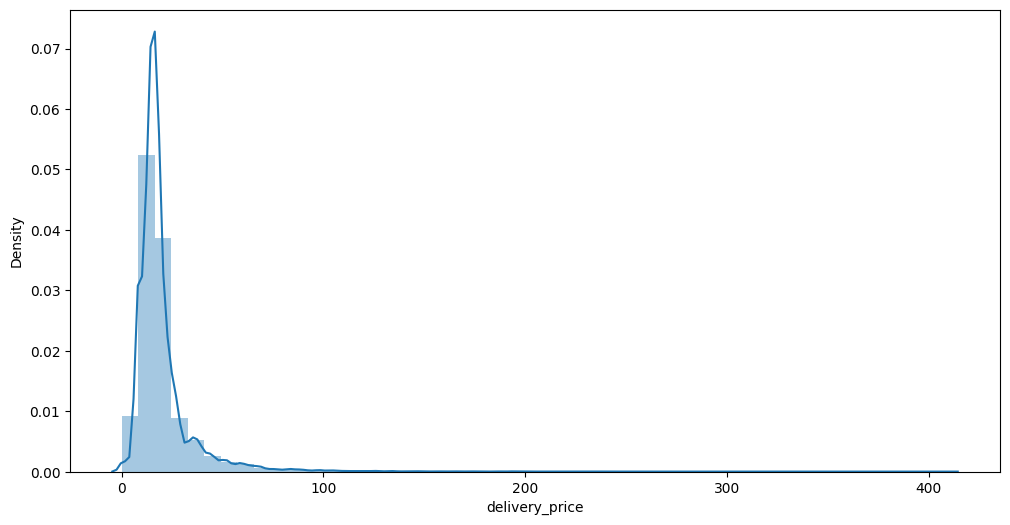

In [55]:
histogram(df_info_clients['delivery_price'])

<Axes: ylabel='Density'>

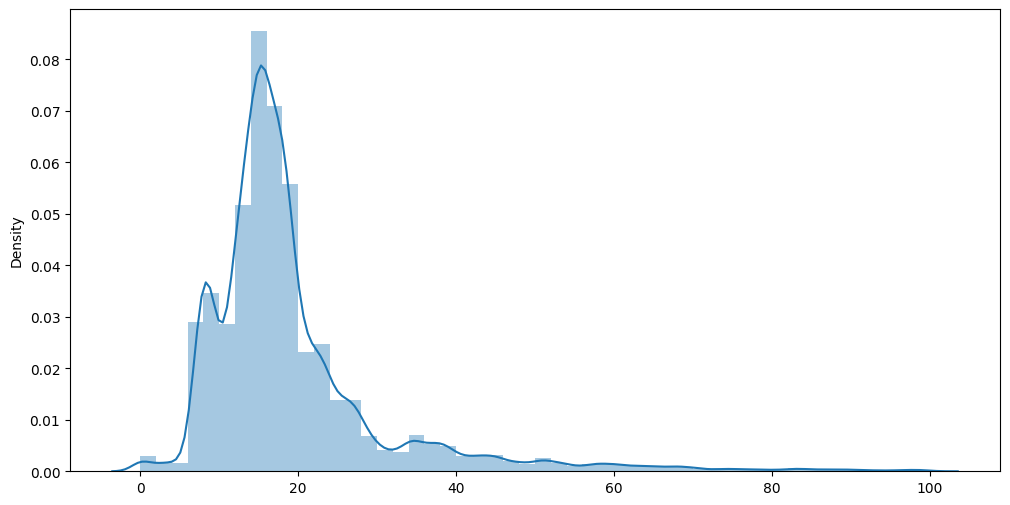

In [56]:
histogram(df_info_clients[df_info_clients['delivery_price']<100][['delivery_price']])

#### 3.3)Total Price 

In [57]:
statistics(df_info_clients['total_price'])

,mean,median,std,min,max,skew,kurtosis
0,172.910258,108.19,267.622516,0.0,13664.08,14.143067,511.101708


<Axes: xlabel='total_price', ylabel='Density'>

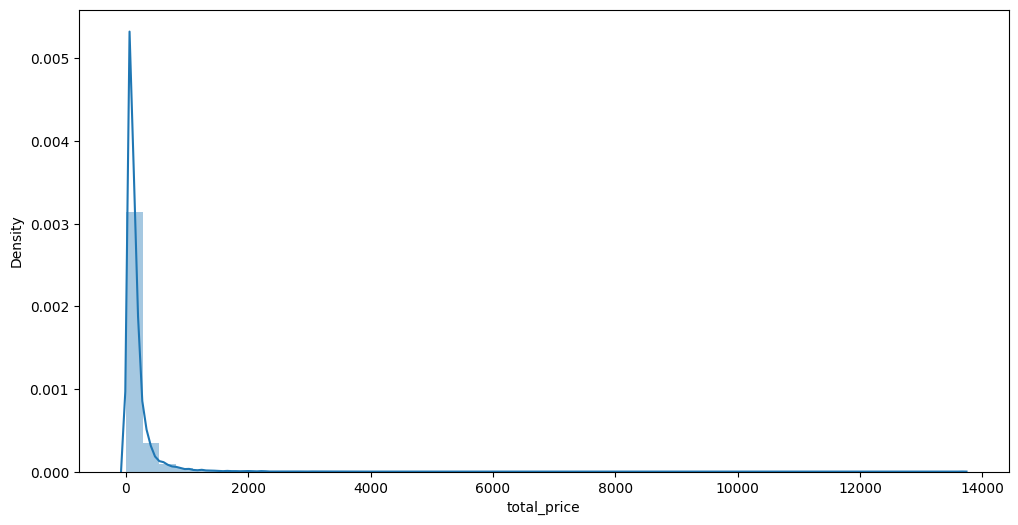

In [58]:
histogram(df_info_clients['total_price'])

<Axes: ylabel='Density'>

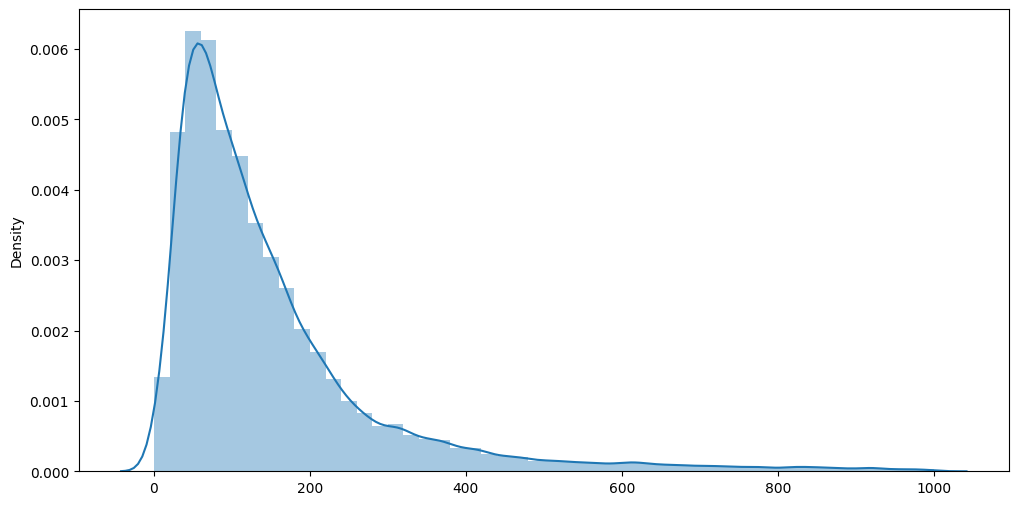

In [59]:
histogram(df_info_clients[df_info_clients['total_price']<1000][['total_price']])

#### 3.4) Review

In [60]:
statistics(df_info_clients['review'])

,mean,median,std,min,max,skew,kurtosis
0,4.017507,5.0,1.397886,1.0,5.0,-1.247828,0.128808


In [61]:
print("Count of the star rating reviews")
df_info_clients['review'].value_counts(normalize=False)

Count of the star rating reviews


5    65479
4    22017
1    15110
3     9842
2     4133
Name: review, dtype: int64

In [62]:
df_info_clients['review'].value_counts(normalize=True)

5    0.561661
4    0.188856
1    0.129609
3    0.084422
2    0.035452
Name: review, dtype: float64

<Axes: xlabel='review', ylabel='Density'>

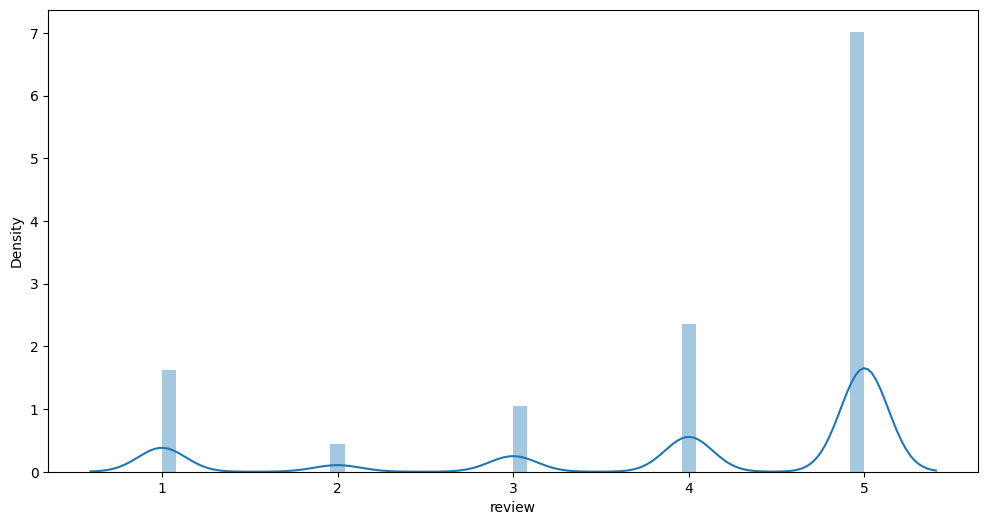

In [63]:
histogram(df_info_clients['review'])

In [64]:
print(str(df_info_clients['review'].value_counts(normalize=False).sum()) +' clients rated the order and ' + str(df_info_clients['id'].count()) + ' clients made an order in this period, that, 100% of the clients rated the order')

116581 clients rated the order and 116581 clients made an order in this period, that, 100% of the clients rated the order


#### 3.4) Parcels Pay

In [65]:
df_info_clients['divided_pay'].value_counts(normalize=False)

1     58030
2     13515
3     11653
4      7926
10     6867
5      5983
8      5055
6      4587
7      1804
9       724
12      166
15       93
18       38
24       34
11       25
20       21
13       19
14       16
17        7
16        7
21        6
0         3
23        1
22        1
Name: divided_pay, dtype: int64

<Axes: xlabel='divided_pay', ylabel='Density'>

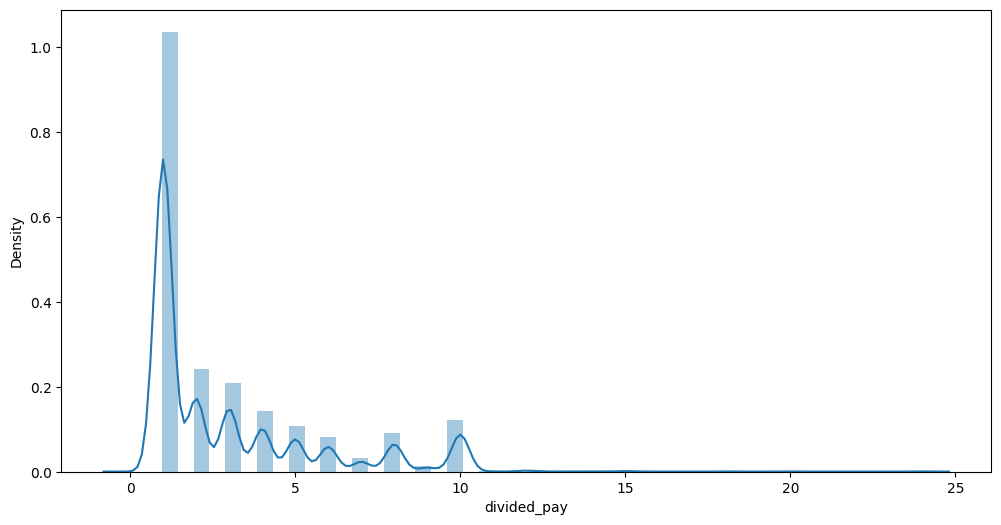

In [66]:
histogram(df_info_clients['divided_pay'])

### 4) Creating Hypothesis 

#### 4.1) Which group of customers should we send each marketing campaign?

1) Clients living in southeast of Brazil are more likely to buy more products.


#### 4.2) How to define which products should appear as a suggestion for each type of customer?

1) The correlation between category and the client's city

2) The correlation between category and the client's state


#### 4.3) How can we increase the sales conversion?

1) Sales that were delivered quicker has a better rating review

2) Sales with lower delivery prices has a better rating review

3) Sales with no develivery expenses are more likely to be bought

4) Sales that were delivered after the estimated date has a lower rating

5) Bed, bath, table, heath and beauty are more likely to be bought 

6) The clients are more likely to buy near holidays such as christmas

# Bivariate Analysis

In [67]:
def statistics_bi (col1, col2, df):
    x_mean = df[[col1, col2]].groupby([col1]).mean().reset_index().sort_values(by = [col1])
    x_count = df[[col1, col2]].groupby([col1]).count().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_median = df[[col1, col2]].groupby([col1]).median().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_std = df[[col1, col2]].groupby([col1]).std().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_min = df[[col1, col2]].groupby([col1]).min().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_max = df[[col1, col2]].groupby([col1]).max().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_skew = df[[col1, col2]].groupby([col1]).skew().reset_index().sort_values(by = [col1]).iloc[:,1]
    
    x_stats = pd.concat( [x_mean, x_median, x_std, x_min, x_max, x_skew, x_count], axis = 1)
    x_stats.columns = [col1,'mean', 'median', 'std', 'min', 'max', 'skew', 'count']
    return x_stats
    

## State X Price

In [68]:
statistics_bi ('client_state', 'order_price', df_info_clients).sort_values(by = ['count'], ascending=False)

,client_state,mean,median,std,min,max,skew,count
25,SP,109.945161,69.900,164.781768,0.85,6499.00,8.371865,49133
18,RJ,124.907719,79.900,187.829321,0.85,4799.00,7.161406,15185
10,MG,120.181602,75.900,178.696400,3.85,4099.99,7.520461,13530
22,RS,121.528005,75.000,178.510445,3.06,3124.00,6.478193,6436
17,PR,118.520140,72.500,178.304732,2.90,2999.99,6.774623,5908
23,SC,125.193853,75.000,195.191611,3.90,3109.99,6.813985,4254
4,BA,134.056214,79.990,203.387776,5.20,2999.89,6.222613,3994
6,DF,126.639838,79.000,225.588121,4.90,3999.00,9.664926,2467
8,GO,126.915630,79.900,173.298543,3.90,2299.95,5.277412,2396
7,ES,121.402328,77.920,213.014756,5.99,6729.00,15.356454,2332


In [69]:
statistics_bi('client_city', 'order_price', df_info_clients).sort_values(by = ['count'], ascending=False).head(10)

,client_city,mean,median,std,min,max,skew,count
3576,sao paulo,108.137788,67.900,163.808688,1.20,4399.87,7.493990,18412
3136,rio de janeiro,126.087075,79.900,192.596530,5.30,3930.00,6.624127,8123
451,belo horizonte,112.906541,69.990,162.660013,4.90,3099.00,6.689155,3218
556,brasilia,127.097834,79.000,226.186535,4.90,3999.00,9.641405,2452
1139,curitiba,120.752991,69.900,191.152565,2.90,2999.99,6.777059,1799
704,campinas,113.402474,66.990,167.875505,4.90,1999.99,5.540527,1722
2945,porto alegre,118.282541,79.000,144.267402,5.99,1934.00,5.283697,1641
3228,salvador,128.918451,79.900,179.904010,5.20,2951.00,6.027207,1498
1523,guarulhos,110.863545,74.945,145.843812,4.99,1999.00,5.812726,1388
3409,sao bernardo do campo,97.259682,59.990,137.729551,6.04,1999.00,6.374592,1100


## City Capital X Price

In [70]:
df_capitals = pd.read_csv('data/capital.csv')
df_capitals

,Capitais,Estados,Siglas dos estados,Regiões
0,aracaju,Sergipe,SE,Nordeste
1,belem,Pará,PA,Norte
2,belo horizonte,Minas Gerais,MG,Sudeste
3,boa vista,Roraima,RR,Norte
4,braslia,Distrito Federal,DF,Centro-Oeste
5,campo grande,Mato Grosso do Sul,MS,Centro-Oeste
6,cuiaba,Mato Grosso,MT,Centro-Oeste
7,curitiba,Paraná,PR,Sul
8,florianopolis,Santa Catarina,SC,Sul
9,fortaleza,Ceará,CE,Nordeste


In [71]:
df_only_capitals = df_info_clients.loc[df_info_clients['client_city'].isin(df_capitals['Capitais'])].reset_index(drop=True)

In [72]:
print('The capitals represent ' + 
      str(round(df_only_capitals['id'].count()/df_info_clients['id'].count(),4)*100) + 
      '% of the total orders')

print('The capitals represent ' + 
      str(round(df_only_capitals['order_price'].sum()/df_info_clients['order_price'].sum(),2)*100) + 
      '% of the total spent ')

The capitals represent 35.79% of the total orders
The capitals represent 36.0% of the total spent 


In [73]:
statistics_bi('client_city', 'order_price', df_only_capitals).sort_values(by = ['count'], ascending=False)

,client_city,mean,median,std,min,max,skew,count
23,sao paulo,108.137788,67.900,163.808688,1.20,4399.87,7.493990,18412
20,rio de janeiro,126.087075,79.900,192.596530,5.30,3930.00,6.624127,8123
2,belo horizonte,112.906541,69.990,162.660013,4.90,3099.00,6.689155,3218
6,curitiba,120.752991,69.900,191.152565,2.90,2999.99,6.777059,1799
16,porto alegre,118.282541,79.000,144.267402,5.99,1934.00,5.283697,1641
21,salvador,128.918451,79.900,179.904010,5.20,2951.00,6.027207,1498
9,goiania,132.189800,79.900,192.714680,6.25,2299.95,5.410136,852
8,fortaleza,137.248699,79.990,184.134333,7.80,1890.00,4.811982,753
18,recife,131.218169,79.900,206.247039,6.99,3700.00,9.169411,699
7,florianopolis,130.192783,71.000,222.748952,5.99,3109.99,7.202499,672


## Southeast X Price

In [74]:
df_SE = df_info_clients[df_info_clients['client_state'].isin(['SP', 'RJ', 'MG'])] 

In [75]:
print('The Southeast cities represent ' + 
      str(round(df_SE['id'].count()/df_info_clients['id'].count(),4)*100) + 
      '% of the total orders')

print('The Southeast cities represent ' + 
      str(round(df_SE['order_price'].sum()/df_info_clients['order_price'].sum(),2)*100) + 
      '% of the total spent ')

print('The Southeast has ' + 
      str(df_info_clients['client_city'].drop_duplicates().count()) + 
      ' different cities ')

The Southeast cities represent 66.78% of the total orders
The Southeast cities represent 63.0% of the total spent 
The Southeast has 4095 different cities 


In [76]:
statistics_bi('client_city', 'order_price', df_SE).sort_values(by = ['count'], ascending=False)

,client_city,mean,median,std,min,max,skew,count
1315,sao paulo,108.137788,67.900,163.808688,1.20,4399.87,7.493990,18412
1138,rio de janeiro,126.087075,79.900,192.596530,5.30,3930.00,6.624127,8123
142,belo horizonte,112.906541,69.990,162.660013,4.90,3099.00,6.689155,3218
246,campinas,113.402474,66.990,167.875505,4.90,1999.99,5.540527,1722
540,guarulhos,110.863545,74.945,145.843812,4.99,1999.00,5.812726,1388
...,...,...,...,...,...,...,...,...
1207,santa rita da floresta,79.000000,79.000,NaN,79.00,79.00,NaN,1
1202,santa maria do salto,38.000000,38.000,NaN,38.00,38.00,NaN,1
1199,santa maria,8.000000,8.000,NaN,8.00,8.00,NaN,1
491,frei gaspar,74.900000,74.900,NaN,74.90,74.90,NaN,1


### Sales that were delivered quicker has a better rating review

In [95]:
#calculate the number of days unit the delivery
df_info_clients['order_approved'] = pd.to_datetime(df_info_clients['order_approved'])
df_info_clients['order_delivery'] = pd.to_datetime(df_info_clients['order_delivery'])
df_info_clients['days_until_delivery']  = (df_info_clients['order_delivery'] - df_info_clients['order_approved']).dt.days

In [96]:
df_info_clients.head()

,id,client_id,client_specific_id,item_id,client _postal_code,client_city,client_state,order_id,order_status,order_date,...,paymeny_type,divided_pay,total_price,review,category,category_english,salesman_postal,salesman_city,salesman_state,days_until_delivery
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,8.0
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,17.0
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,17.0
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,17.0
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,23.0


<Axes: xlabel='days_until_delivery', ylabel='Density'>

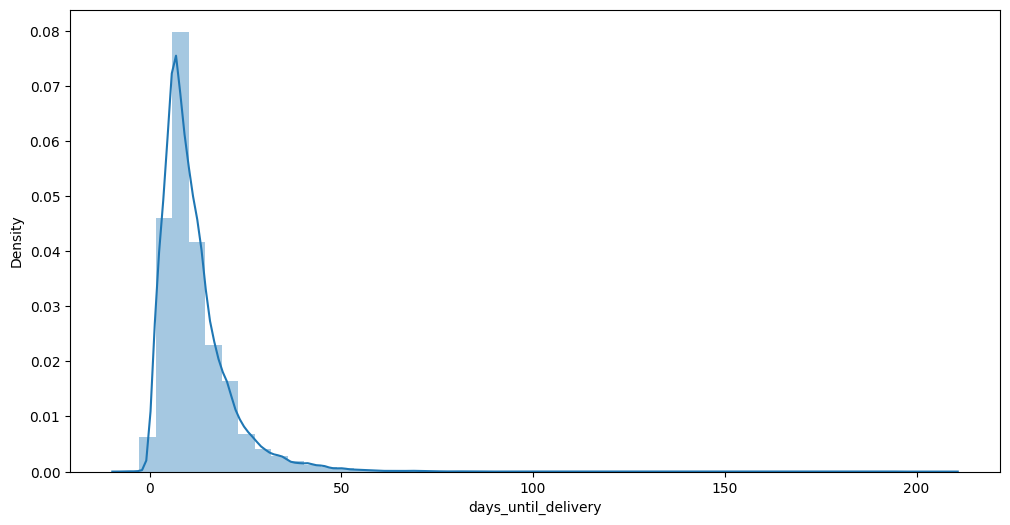

In [171]:
histogram(df_info_clients['days_until_delivery'])

5    65479
4    22017
1    15110
3     9842
2     4133
Name: review, dtype: int64


<Axes: xlabel='review', ylabel='Count'>

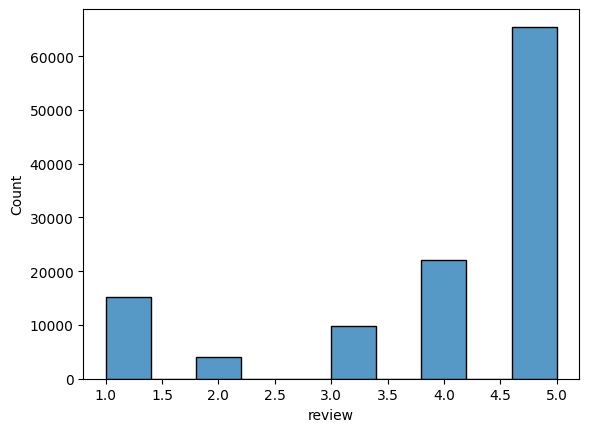

In [157]:
print(df_info_clients['review'].value_counts(normalize=False))
sns.histplot(df_info_clients['review'], bins = 10)

Histogram of the number of days until delivery of reviews = 1


<Axes: xlabel='days_until_delivery', ylabel='Count'>

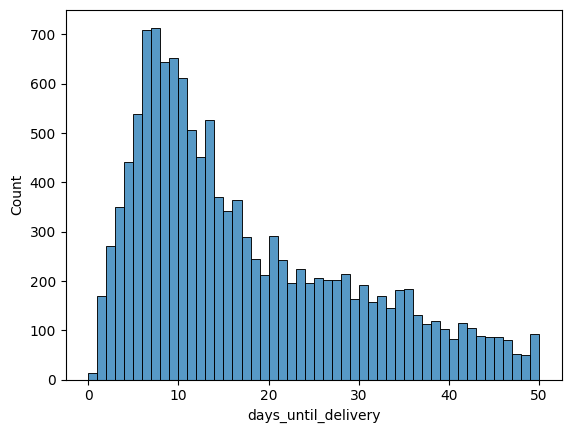

In [173]:
print('Histogram of the number of days until delivery of reviews = 1')
sns.histplot(df_info_clients[df_info_clients['review']==1]['days_until_delivery'], bins = 50, binrange = (0,50))

Histogram of the number of days until delivery of reviews = 2


<Axes: xlabel='days_until_delivery', ylabel='Count'>

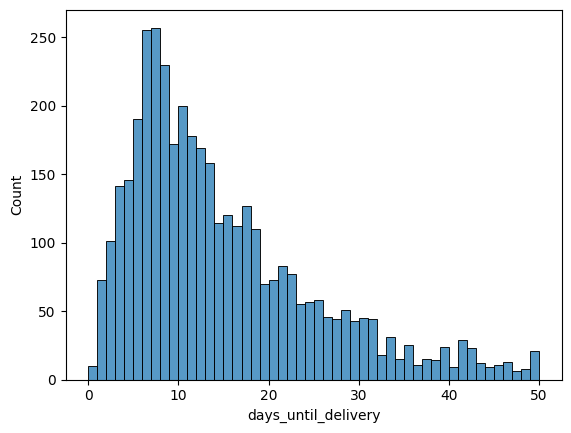

In [174]:
print('Histogram of the number of days until delivery of reviews = 2')
sns.histplot(df_info_clients[df_info_clients['review']==2]['days_until_delivery'], bins = 50, binrange = (0,50))

Histogram of the number of days until delivery of reviews = 3


<Axes: xlabel='days_until_delivery', ylabel='Count'>

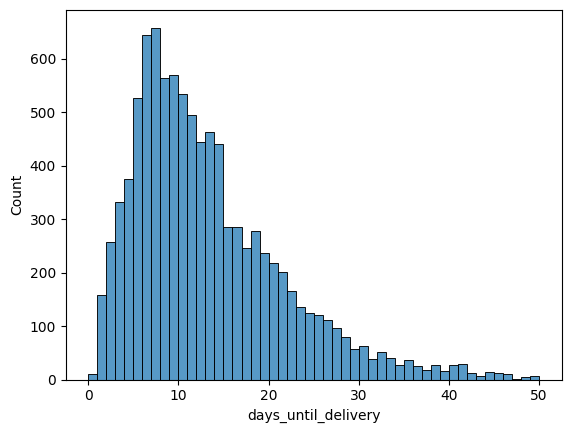

In [175]:
print('Histogram of the number of days until delivery of reviews = 3')
sns.histplot(df_info_clients[df_info_clients['review']==3]['days_until_delivery'], bins = 50, binrange = (0,50))

Histogram of the number of days until delivery of reviews = 4


<Axes: xlabel='days_until_delivery', ylabel='Count'>

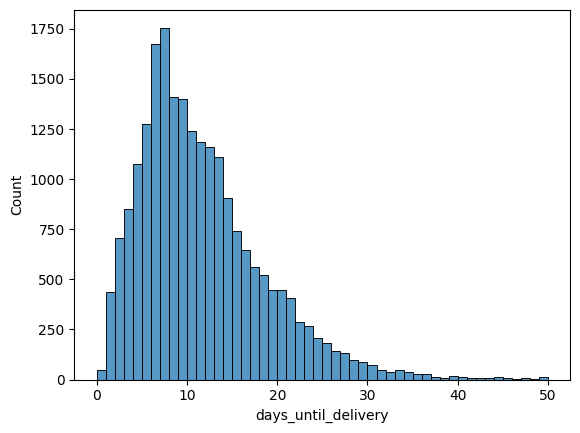

In [176]:
print('Histogram of the number of days until delivery of reviews = 4')
sns.histplot(df_info_clients[df_info_clients['review']==4]['days_until_delivery'], bins = 50, binrange = (0,50))

Histogram of the number of days until delivery of reviews = 5


<Axes: xlabel='days_until_delivery', ylabel='Count'>

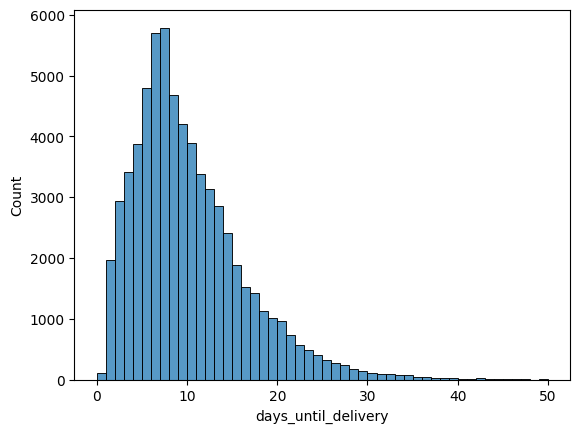

In [177]:
print('Histogram of the number of days until delivery of reviews = 5')
sns.histplot(df_info_clients[df_info_clients['review']==5]['days_until_delivery'], bins = 50, binrange = (0,50))